In [1]:
import tensorflow as tf
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Adagrad, Adadelta

In [2]:
main_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(main_dir,'train')
validation_dir = os.path.join(main_dir,'validation')

In [3]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [4]:
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True,
                    fill_mode = 'nearest')

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [7]:
validation_generator = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150,150),
                    batch_size = 20,
                    class_mode='binary')

Found 1000 images belonging to 2 classes.


## Building the CNN model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [9]:
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(lr=1e-4),
             metrics = ['acc'])

In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 10,
    verbose = 1)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 10 steps
Epoch 1/100
100/100 [==============================] - 13s 128ms/step - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6832 - val_acc: 0.6100
Epoch 2/100
100/100 [==============================] - 12s 119ms/step - loss: 0.6830 - acc: 0.5515 - val_loss: 0.7233 - val_acc: 0.5100
Epoch 3/100
100/100 [==============================] - 12s 117ms/step - loss: 0.6748 - acc: 0.5800 - val_loss: 0.6484 - val_acc: 0.6150
Epoch 4/100
100/100 [==============================] - 13s 128ms/step - loss: 0.6597 - acc: 0.5945 - val_loss: 0.6641 - val_acc: 0.5800
Epoch 5/100
100/100 [==============================] - 14s 143ms/step - loss: 0.6372 - acc: 0.6335 - val_loss: 0.5776 - val_acc: 0.6950
Epoch 6/100
100/100 [==============================] - 13s 131ms/step - loss: 0.6288 - acc: 0.6405 - val_loss: 0.5710 - val_acc: 0.7050
Epoch 7/100
100

100/100 [==============================] - 18s 182ms/step - loss: 0.4284 - acc: 0.8075 - val_loss: 0.4405 - val_acc: 0.7800
Epoch 58/100
100/100 [==============================] - 18s 183ms/step - loss: 0.4274 - acc: 0.8010 - val_loss: 0.4058 - val_acc: 0.8200
Epoch 59/100
100/100 [==============================] - 18s 179ms/step - loss: 0.4277 - acc: 0.7930 - val_loss: 0.4632 - val_acc: 0.7850
Epoch 60/100
100/100 [==============================] - 18s 179ms/step - loss: 0.4345 - acc: 0.8020 - val_loss: 0.3976 - val_acc: 0.8150
Epoch 61/100
100/100 [==============================] - 18s 183ms/step - loss: 0.4117 - acc: 0.8070 - val_loss: 0.4710 - val_acc: 0.7950
Epoch 62/100
100/100 [==============================] - 20s 195ms/step - loss: 0.4233 - acc: 0.8045 - val_loss: 0.3989 - val_acc: 0.8050
Epoch 63/100
100/100 [==============================] - 18s 181ms/step - loss: 0.4198 - acc: 0.7990 - val_loss: 0.3964 - val_acc: 0.8300
Epoch 64/100
100/100 [==============================] 

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

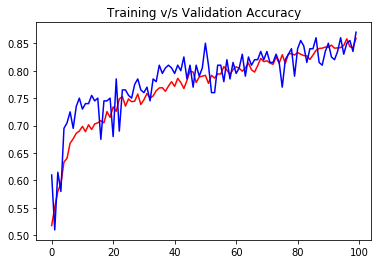

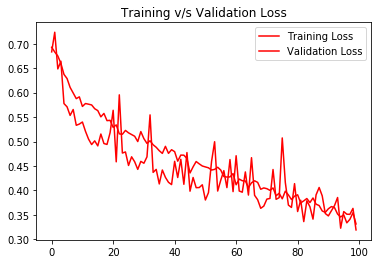

In [12]:
#Plot graphs to deepen understanding

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training v/s Validation Accuracy')
plt.figure()

plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Training v/s Validation Loss')
plt.legend()
plt.show()